# <p align="center"> **IE x NTT DATA SUSTAINABILITY DATATHON** </p>

# <p align="center"> TEAM - THE CARBON CUTTERS </p>

## <p align="center"> MEMBERS </p>

<p align="center">
  <img src="https://media.licdn.com/dms/image/D4D03AQH_PACLPDGbeA/profile-displayphoto-shrink_200_200/0/1670599230588?e=1682553600&v=beta&t=4Eqp39qIQLHcSDFrKoenJczbqybQmLKlw35PNUEDoFw" width="100"/>
  <img src="https://media.licdn.com/dms/image/D4D03AQGe-xj9NZJ-4A/profile-displayphoto-shrink_200_200/0/1665917834933?e=1682553600&v=beta&t=KeaNvK4KGZ2wwKCy28MOh8vX6vsdUeLRVXuJHbWXKe4" width="100"/>  <br> Gustavo Welsh <t><t><t>   Ramón Peláez <br>
</p>

<p align="center">
  <img src="https://media.licdn.com/dms/image/D4D03AQHlzxpJrObGRQ/profile-displayphoto-shrink_200_200/0/1670599292787?e=1682553600&v=beta&t=HW9ewnB1CTzcEEyU-cNajnKEbqxqt2KFyEqQrTOvt_4" width="100"/>
  <img src="https://media.licdn.com/dms/image/D4D03AQFLfph9qgky0w/profile-displayphoto-shrink_200_200/0/1666261472860?e=1682553600&v=beta&t=Rv5oP6iVtQ2LKahCYUU-418bCU5GkNeonqPsdevKg1c" width="100"/> <br> Dilhan Tanir <t><t><t>   Felipe Basurto <br>
</p>


Hi! We are the Carbon Cutters, a team of 4 students pursuing a Master's in Big Data and Business Analytics at IE School of Science and Technology. We are passionate about artificial intelligence, data science, and machine learning.

This notebook is our submission for the IE Sustainability Datathon, in which we had a great time and learned a lot. It is divided into several parts, including initial data exploration, in-depth data analysis, data cleaning, preparation, feature engineering, and predictive modeling.


-----------------------------------

## Importing Libraries and the datasets

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, precision_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.utils import shuffle

from xgboost import XGBClassifier
import lightgbm as lgb


network = pd.read_csv("data/network.csv")                      # Pipes description
inspections = pd.read_csv("data/inspections.csv")              # Inspections run on the pipes historical data
sample_submission = pd.read_csv("data/sample_submission.csv")  # Pipes to test

-----------------------------------

# <p align="center"> **EXPLORATORY DATA ANALYSIS** </p>

In [15]:
network.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446539 entries, 0 to 1446538
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   PipeId               1446539 non-null  int64  
 1   Province             1446539 non-null  object 
 2   Town                 1446539 non-null  object 
 3   YearBuilt            1446539 non-null  int64  
 4   Material             1446539 non-null  object 
 5   GasType              1446539 non-null  object 
 6   Diameter             1446539 non-null  float64
 7   Length               1446539 non-null  float64
 8   Pressure             1446539 non-null  float64
 9   NumConnections       1446539 non-null  int64  
 10  NumConnectionsUnder  1446539 non-null  int64  
 11  BoolBridle           1446539 non-null  bool   
dtypes: bool(1), float64(3), int64(4), object(4)
memory usage: 122.8+ MB


In [16]:
inspections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6345344 entries, 0 to 6345343
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   PipeId          int64 
 1   MaintenanceId   object
 2   InspectionYear  int64 
 3   InspectionDate  object
 4   MonthsLastRev   int64 
 5   Severity        int64 
 6   Incidence       int64 
dtypes: int64(5), object(2)
memory usage: 338.9+ MB


**Exploring for outliers (Pressure, Length, Diameter, Connections)**

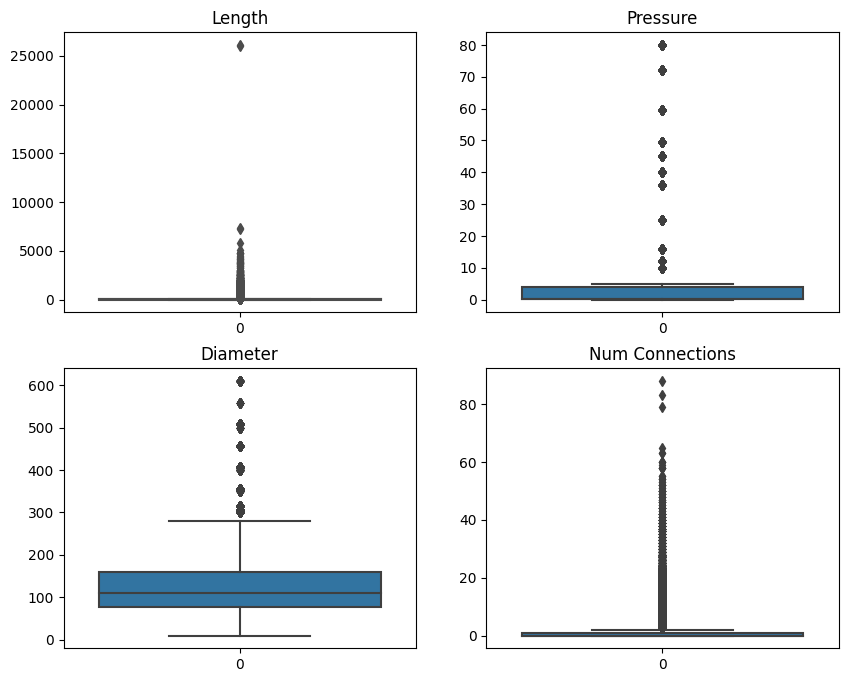

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8)) # Defining size of the plot-grid

# Plot a boxplot for each column in its own subplot
sns.boxplot(ax=axes[0, 0], data=network['Length'], color='red')
sns.boxplot(ax=axes[0, 1], data=network['Pressure'])
sns.boxplot(ax=axes[1, 0], data=network['Diameter'])
sns.boxplot(ax=axes[1, 1], data=network['NumConnections'])

axes[0, 0].set_title('Length')
axes[0, 1].set_title('Pressure')
axes[1, 0].set_title('Diameter')
axes[1, 1].set_title('Num Connections')
plt.show()

We are able to find some big outliers, specially in the Length column

**Checking YearBuilt column**

In [18]:
network["YearBuilt"].unique()

array([2012, 2013, 2010, 2009, 2011, 2007, 2014, 2015, 2016, 2017, 2018,
       2019, 2008, 2020, 2000, 1998, 1999, 1997, 2001, 2002, 2003, 2004,
       2005, 2006, 1901, 1996, 1995, 1985, 1950, 1994, 2021, 1993, 1992,
       1971, 1991, 1989, 1990, 1988, 1987, 1986, 1984, 1981, 1978, 1982,
       1977, 1980, 1970, 1963, 1966, 1972, 1973, 1983, 1974, 1979, 1976,
       1975, 1965, 2022, 1967, 1959, 1969, 1957, 1956, 1968, 1964, 1962,
       1960, 2050, 1951, 1954, 1952, 1914, 1958, 1961, 1949, 1929, 1920,
       1953, 1936, 1938, 1925, 1928, 1937, 1941, 1943, 1955, 1923, 1926,
       1930, 1912, 1932, 1934, 1944, 1940, 1927], dtype=int64)

In [19]:
len(network[network["YearBuilt"] > 2021])

116

Makes zero sense that some pipes were built in years after 2021, because it is the last year we have data from

In [20]:
# Merging both dataframes into one

network_inspections =  inspections.merge(network, left_on = "PipeId", right_on = "PipeId", how = "inner")

In [21]:
# Extracting the year when each pipe was built

yearbuilt_set = network_inspections.loc[:,["PipeId", "InspectionDate", "YearBuilt"]]
yearbuilt_set["InspectionYear"] = yearbuilt_set["InspectionDate"].str.split("-").str[0].apply(int)
yearbuilt_set.head()

,PipeId,InspectionDate,YearBuilt,InspectionYear
0,189311802,2010-10-01,2001,2010
1,189311802,2012-10-01,2001,2012
2,189311802,2014-10-08,2001,2014
3,189311802,2016-10-14,2001,2016
4,189311802,2018-10-09,2001,2018


In [22]:
# Sort the yearbuilt_set DataFrame by InspectionDate and group by PipeId, keeping only the first row for each group.
# Filter the resulting DataFrame to keep only rows where YearBuilt is greater than InspectionYear.
# Store the filtered DataFrame in group_yearbuilt_set_filt.

group_yearbuilt_set = yearbuilt_set.sort_values(by = "InspectionDate").groupby("PipeId").first()
group_yearbuilt_set_filt = group_yearbuilt_set[group_yearbuilt_set["YearBuilt"] > group_yearbuilt_set["InspectionYear"]]
group_yearbuilt_set_filt

,InspectionDate,YearBuilt,InspectionYear
PipeId,,,
754590,2013-03-11,2014,2013
887807,2013-06-18,2014,2013
942556,2013-06-18,2014,2013
942596,2013-06-18,2014,2013
942599,2013-06-18,2014,2013
...,...,...,...
443075496,2013-04-08,2014,2013
451119826,2015-05-08,2018,2015
451119835,2015-05-08,2018,2015


In [23]:
# Here we have just one entry per pipe

group_yearbuilt_set_filt.reset_index()["PipeId"].value_counts()

754590       1
340525148    1
340525409    1
340525371    1
340525362    1
            ..
30141401     1
30133048     1
30132980     1
30132971     1
451119971    1
Name: PipeId, Length: 4890, dtype: int64

In [24]:
# Add a new column to the group_yearbuilt_set_filt DataFrame called "Impute_YearBuilt", which is computed by subtracting 2 from the InspectionYear column.
# Store the modified DataFrame back into group_yearbuilt_set_filt.

group_yearbuilt_set_filt["Impute_YearBuilt"] = group_yearbuilt_set_filt["InspectionYear"] - 2
group_yearbuilt_set_filt

C:\Users\fejab\AppData\Local\Temp\ipykernel_10652\1499560530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_yearbuilt_set_filt["Impute_YearBuilt"] = group_yearbuilt_set_filt["InspectionYear"] - 2


,InspectionDate,YearBuilt,InspectionYear,Impute_YearBuilt
PipeId,,,,
754590,2013-03-11,2014,2013,2011
887807,2013-06-18,2014,2013,2011
942556,2013-06-18,2014,2013,2011
942596,2013-06-18,2014,2013,2011
942599,2013-06-18,2014,2013,2011
...,...,...,...,...
443075496,2013-04-08,2014,2013,2011
451119826,2015-05-08,2018,2015,2013
451119835,2015-05-08,2018,2015,2013


In [12]:
network.set_index("PipeId", inplace=True)

# Merge the two dataframes on the index
df_merged = network.merge(group_yearbuilt_set_filt, on='PipeId', how='left')

# Fill any NaN values in the impute_year_built column with the values from year_built
df_merged['Impute_YearBuilt'] = df_merged['Impute_YearBuilt'].fillna(df_merged['YearBuilt_x'])

# Overwrite the year_built column with the impute_year_built values
network['YearBuilt'] = df_merged['Impute_YearBuilt'].apply(int)

#Go back to the original dataset
network = network.reset_index()

In [13]:
len(network[network["YearBuilt"] > 2025])

0

We no longer have pipes which, possibly by an error, they appear to have been built in the future.

**Correlation Matrix**

C:\Users\fejab\AppData\Local\Temp\ipykernel_10652\3610597057.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = network_inspections.corr()


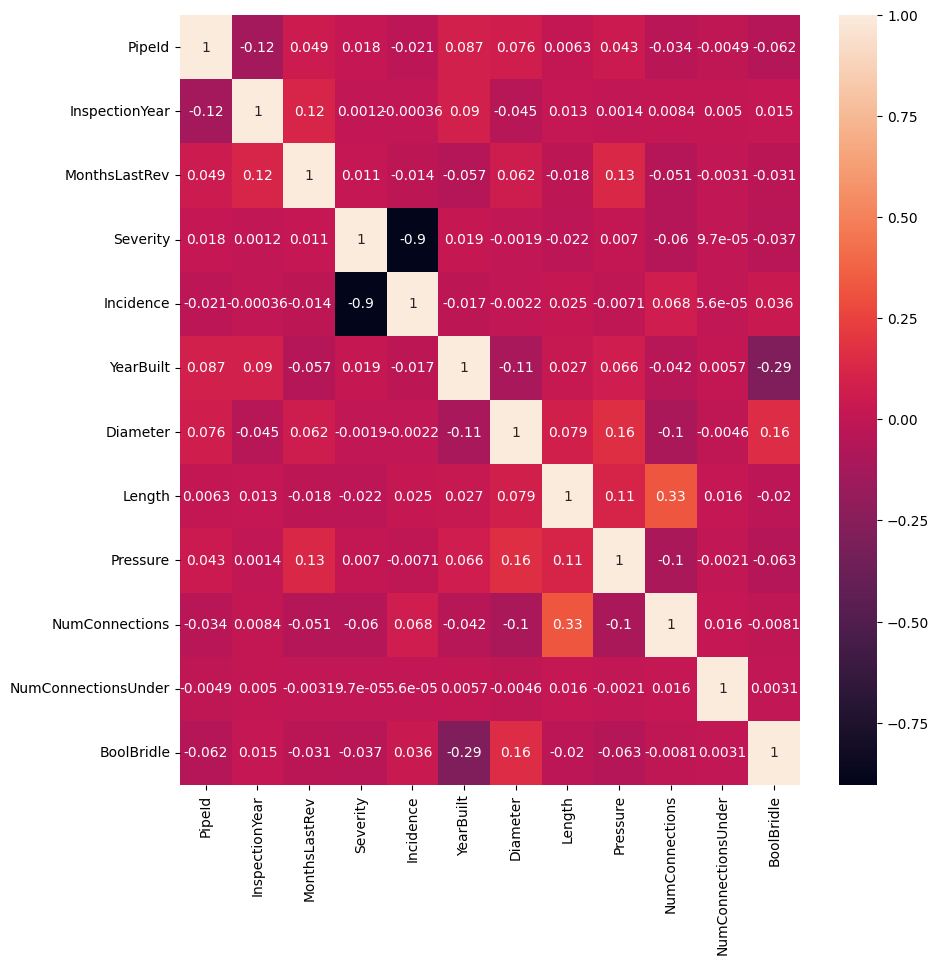

In [25]:
# Plotting the correlation matrix, to check which variables are too correlated with others.

corr = network_inspections.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot = True)
plt.show()

-----------------------------------

# <p align="center"> **FEATURE ENGINEERING** </p>

**Severity Variable**

`Severity` is one of the columns we should remove inmediatly from the dataframe. As we are able to see below, a grade of Severity different than 4, always means that there was an incidence. So it is just basically another column telling us if there was an incidence when inspecting the pipe or not.

In [26]:
inspections.groupby("Severity")["Incidence"].mean()

Severity
1    1.0
2    1.0
3    1.0
4    0.0
Name: Incidence, dtype: float64

In [27]:
inspections.drop(columns = "Severity" ,inplace = True)

**Town**

In [28]:
# We have created a new variable for knowing the number of Pipes per Town

town_pipes = network.groupby("Town").count()["PipeId"]
town_pipes = pd.DataFrame(town_pipes).reset_index().rename(columns = {"Town": "Town", "PipeId":"TotalPipesPerTown"})
town_pipes.head()

,Town,TotalPipesPerTown
0,Abegondo,94
1,Abejar,3
2,Abrera,1684
3,Ador,174
4,Adzaneta de Albaida,42


In [29]:
network =  network.merge(town_pipes, left_on = "Town", right_on = "Town", how = "left")
network.head()

,PipeId,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,TotalPipesPerTown
0,489616,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,63.0,7.792,0.4,0,0,False,502
1,489645,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,90.0,2.080,0.4,0,0,False,502
2,489646,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,90.0,111.173,0.4,3,0,False,502
3,519950,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,200.0,14.304,0.4,0,0,False,502
4,1332439,Ciudad Real,Torralba de Calatrava,2012,PE,Gas natural,160.0,22.669,0.4,1,0,False,502


This is the resulting dataframe. With the `TotalPipesPerTown` column added

**EDA Inspections and Incidences**

In [30]:
#Creating a new variable where it adds a 1 to each inpsection
inspections["Inspections"] = 1

# Creating a new column "Number of inspection" that shows the number of inspections each pipe has had
inspections["Number_of_inspection"] = inspections.groupby("PipeId")["Inspections"].cumsum()

In [31]:
# Creating a new column "Number of incidence" that shows the number of incidences each pipe has had
inspections["Number_of_incidences"] = inspections.groupby("PipeId")["Incidence"].cumsum()

In this next line of code. We came to realise that when testing our model, the `Number_of_incidences` was already telling our model if that specific pipe has had an inspection. That is why we are making it (i - 1). That way the row only gives info about past incidences.

In [32]:
# Substracting 1 for knowing how mnany incdences each pipe has have before that inspection
inspections.loc[(inspections["Number_of_incidences"] > 0) & (inspections["Incidence"] ==1), 'Number_of_incidences'] -= 1

**Merging Data**

In [33]:
# We merge the data again to apply all changes made

network_inspections =  inspections.merge(network, left_on = "PipeId", right_on = "PipeId", how = "right")
network_inspections.head()

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Incidence,Inspections,Number_of_inspection,Number_of_incidences,Province,...,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,TotalPipesPerTown
0,489616,ZRV-00003385,2013.0,2013-05-08,16.0,0.0,1.0,1.0,0.0,Ciudad Real,...,2012,PE,Gas natural,63.0,7.792,0.4,0,0,False,502
1,489616,ZRV-00003385,2015.0,2015-03-04,22.0,0.0,1.0,2.0,0.0,Ciudad Real,...,2012,PE,Gas natural,63.0,7.792,0.4,0,0,False,502
2,489616,ZRV-00003385,2016.0,2017-01-12,22.0,0.0,1.0,3.0,0.0,Ciudad Real,...,2012,PE,Gas natural,63.0,7.792,0.4,0,0,False,502
3,489616,ZRV-00003385,2018.0,2018-12-19,23.0,0.0,1.0,4.0,0.0,Ciudad Real,...,2012,PE,Gas natural,63.0,7.792,0.4,0,0,False,502
4,489616,ZRV-00003385,2020.0,2020-12-05,24.0,0.0,1.0,5.0,0.0,Ciudad Real,...,2012,PE,Gas natural,63.0,7.792,0.4,0,0,False,502


**Calculating two different rates**

In [34]:
#Rate of incidences per Province

Incidences_Province = pd.DataFrame(network_inspections.groupby("Province")["Incidence"].sum()).reset_index()
Pipes_Province = pd.DataFrame(network_inspections.groupby("Province")["PipeId"].nunique()).reset_index()
Pipes_Province["Rate_Prov"] = Incidences_Province ["Incidence"] /  Pipes_Province["PipeId"]

In [35]:
#Rate of incidences per Material

Incidences_Material = pd.DataFrame(network_inspections.groupby("Material")["Incidence"].sum()).reset_index()
Pipes_Material = pd.DataFrame(network_inspections.groupby("Material")["PipeId"].nunique()).reset_index()
Pipes_Material["Rate_Mat"] = Incidences_Material ["Incidence"] /  Pipes_Material["PipeId"]

In [36]:
network_inspections =  Pipes_Province[["Province" , "Rate_Prov"]].merge(network_inspections, on = "Province", how = "right")
network_inspections =  Pipes_Material[["Material" , "Rate_Mat"]].merge(network_inspections, on = "Material", how = "right")
network_inspections.head()

,Material,Rate_Mat,Province,Rate_Prov,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Incidence,...,Town,YearBuilt,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,TotalPipesPerTown
0,PE,0.007224,Ciudad Real,0.004398,489616,ZRV-00003385,2013.0,2013-05-08,16.0,0.0,...,Torralba de Calatrava,2012,Gas natural,63.0,7.792,0.4,0,0,False,502
1,PE,0.007224,Ciudad Real,0.004398,489616,ZRV-00003385,2015.0,2015-03-04,22.0,0.0,...,Torralba de Calatrava,2012,Gas natural,63.0,7.792,0.4,0,0,False,502
2,PE,0.007224,Ciudad Real,0.004398,489616,ZRV-00003385,2016.0,2017-01-12,22.0,0.0,...,Torralba de Calatrava,2012,Gas natural,63.0,7.792,0.4,0,0,False,502
3,PE,0.007224,Ciudad Real,0.004398,489616,ZRV-00003385,2018.0,2018-12-19,23.0,0.0,...,Torralba de Calatrava,2012,Gas natural,63.0,7.792,0.4,0,0,False,502
4,PE,0.007224,Ciudad Real,0.004398,489616,ZRV-00003385,2020.0,2020-12-05,24.0,0.0,...,Torralba de Calatrava,2012,Gas natural,63.0,7.792,0.4,0,0,False,502


**Dropping useless variables**

In [37]:
#Dropping variables that will not be used

network_inspections.drop(columns = ["MaintenanceId", "Inspections", "InspectionDate"], inplace = True)
network_inspections.head()

,Material,Rate_Mat,Province,Rate_Prov,PipeId,InspectionYear,MonthsLastRev,Incidence,Number_of_inspection,Number_of_incidences,Town,YearBuilt,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,TotalPipesPerTown
0,PE,0.007224,Ciudad Real,0.004398,489616,2013.0,16.0,0.0,1.0,0.0,Torralba de Calatrava,2012,Gas natural,63.0,7.792,0.4,0,0,False,502
1,PE,0.007224,Ciudad Real,0.004398,489616,2015.0,22.0,0.0,2.0,0.0,Torralba de Calatrava,2012,Gas natural,63.0,7.792,0.4,0,0,False,502
2,PE,0.007224,Ciudad Real,0.004398,489616,2016.0,22.0,0.0,3.0,0.0,Torralba de Calatrava,2012,Gas natural,63.0,7.792,0.4,0,0,False,502
3,PE,0.007224,Ciudad Real,0.004398,489616,2018.0,23.0,0.0,4.0,0.0,Torralba de Calatrava,2012,Gas natural,63.0,7.792,0.4,0,0,False,502
4,PE,0.007224,Ciudad Real,0.004398,489616,2020.0,24.0,0.0,5.0,0.0,Torralba de Calatrava,2012,Gas natural,63.0,7.792,0.4,0,0,False,502


**Checking for null values**

This happens beacuse, when merging the network set with the inspections set, there are some pipes which were built recently, which means that no inspection whatsoever was performed on them.

In [38]:
network_inspections.isna().sum()

Material                    0
Rate_Mat                    0
Province                    0
Rate_Prov                   0
PipeId                      0
InspectionYear          18685
MonthsLastRev           18685
Incidence               18685
Number_of_inspection    18685
Number_of_incidences    18685
Town                        0
YearBuilt                   0
GasType                     0
Diameter                    0
Length                      0
Pressure                    0
NumConnections              0
NumConnectionsUnder         0
BoolBridle                  0
TotalPipesPerTown           0
dtype: int64

In [39]:
# Filling InspectionYear with YearBuilt

network_inspections["InspectionYear"].fillna(network_inspections["YearBuilt"], inplace = True)

In [40]:
# Filling the rest of the null values with 0

network_inspections.fillna(0, inplace= True)

In [41]:
# Creating Variable "Years_Old" to substitue the YearBuilt

network_inspections["Years_Old"] = 2021 - network_inspections["YearBuilt"]

-----------------------------------

# <p align="center"> **TRAIN AND TEST DATASET** </p>

**Test DataSet**

We need the test dataframe ready to make our predictions on it, making it uploadeable to kaggle for scoring. That is why we took only the matching pipe ids between our data and the sample submission.

In [42]:
#Merging the sample_submisision with network_inspections

test_df =  sample_submission.merge(network_inspections, on= "PipeId",  how = "inner")
test_df.head()

,PipeId,Incidence_x,Material,Rate_Mat,Province,Rate_Prov,InspectionYear,MonthsLastRev,Incidence_y,Number_of_inspection,...,YearBuilt,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,TotalPipesPerTown,Years_Old
0,446859944,0,PE,0.007224,Valencia,0.006662,2013.0,12.0,0.0,1.0,...,2012,Gas natural,110.0,44.286,0.15,0,0,False,904,9
1,446859944,0,PE,0.007224,Valencia,0.006662,2015.0,24.0,0.0,2.0,...,2012,Gas natural,110.0,44.286,0.15,0,0,False,904,9
2,446859944,0,PE,0.007224,Valencia,0.006662,2017.0,24.0,0.0,3.0,...,2012,Gas natural,110.0,44.286,0.15,0,0,False,904,9
3,446859944,0,PE,0.007224,Valencia,0.006662,2019.0,23.0,0.0,4.0,...,2012,Gas natural,110.0,44.286,0.15,0,0,False,904,9
4,428124500,0,PE,0.007224,Valencia,0.006662,2013.0,12.0,0.0,1.0,...,2012,Gas natural,160.0,110.715,0.15,2,0,False,904,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995627,228228379,0,PE,0.007224,Valencia,0.006662,2012.0,24.0,0.0,1.0,...,2004,Gas natural,160.0,2.325,4.00,0,0,False,4692,17
3995628,228228379,0,PE,0.007224,Valencia,0.006662,2014.0,24.0,0.0,2.0,...,2004,Gas natural,160.0,2.325,4.00,0,0,False,4692,17
3995629,228228379,0,PE,0.007224,Valencia,0.006662,2016.0,23.0,0.0,3.0,...,2004,Gas natural,160.0,2.325,4.00,0,0,False,4692,17
3995630,228228379,0,PE,0.007224,Valencia,0.006662,2018.0,25.0,0.0,4.0,...,2004,Gas natural,160.0,2.325,4.00,0,0,False,4692,17


In [43]:
# We want to extract the index number of the last inspection each of the testing pipes has.

idx = test_df.groupby('PipeId')['Number_of_inspection'].idxmax()

In [44]:
# Extracting the rows with the index number "idx" and dropping varibles we are not using.

result = test_df.loc[idx, :].reset_index(drop=True)
result_test = result.drop(columns = ["Incidence_x" , "Incidence_y", "Material", "NumConnectionsUnder"])

In [45]:
# Adding +1 to the Number of inspection for predicting in the next inspection.

result_test["Number_of_inspection"] = result_test["Number_of_inspection"]  + 1

In [46]:
# Checking the Months since last inspection.

result_test["MonthsLastRev"] = np.where(result_test["InspectionYear"] <= 2019, ((2021 - result_test["InspectionYear"]) * 12), 24)

**Train DataSet**

In [47]:
# Defining train data set

result_train = network_inspections.drop(columns = ["InspectionYear", "Material", "NumConnectionsUnder", "YearBuilt"])

In [48]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ["GasType", "BoolBridle", "Town", "Province"]

for col in categorical_columns:
    le = LabelEncoder()
    result_train[col] = le.fit_transform(result_train[col])
    result_test[col] = le.transform(result_test[col])

In [49]:
# Train data set will be all historic data, taking out does pipes that haven't had any inspection before

result_train = result_train[result_train["Number_of_inspection"] > 0]

In [51]:
result_train.head()

,Rate_Mat,Province,Rate_Prov,PipeId,MonthsLastRev,Incidence,Number_of_inspection,Number_of_incidences,Town,GasType,Diameter,Length,Pressure,NumConnections,BoolBridle,TotalPipesPerTown,Years_Old
0,0.007224,7,0.004398,489616,16.0,0.0,1.0,0.0,1685,0,63.0,7.792,0.4,0,0,502,9
1,0.007224,7,0.004398,489616,22.0,0.0,2.0,0.0,1685,0,63.0,7.792,0.4,0,0,502,9
2,0.007224,7,0.004398,489616,22.0,0.0,3.0,0.0,1685,0,63.0,7.792,0.4,0,0,502,9
3,0.007224,7,0.004398,489616,23.0,0.0,4.0,0.0,1685,0,63.0,7.792,0.4,0,0,502,9
4,0.007224,7,0.004398,489616,24.0,0.0,5.0,0.0,1685,0,63.0,7.792,0.4,0,0,502,9


In [52]:
# Defining the X and the target for the testing data set

X_test_kaggle = result_test.drop(columns = ["PipeId", "InspectionYear", "YearBuilt"])
PipeId_Test = result_test["PipeId"]

-----------------------------------

# <p align="center"> **MODELLING AND PREDICTIONS** </p>

**Dealing with the imbalanced dataset**

In [53]:
all_ones = result_train[result_train["Incidence"] == 1]

**GridSearch CV**

In [54]:
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [18, 21],
    'n_estimators': [200, 500],
    'min_samples_leaf': [5],
    'max_features': ['sqrt']
}

# set the desired size of each training set
train_size = len(all_ones * 2)

# copy of the train data to drop from here
iter_df_ceros = result_train[result_train["Incidence"] == 0].copy()

# create a dataframe to store the predictions
predictions_df = pd.DataFrame()

# get a random subset of rows from iter_df
iter_sample = iter_df_ceros.sample(n=train_size)

# drop the already used rows of the current sample to avoid them being used again
iter_df_ceros.drop(iter_sample.index, inplace=True)

# concatenate all_ones and iter_sample to create the training set
df = pd.concat([all_ones, iter_sample])

# shuffle the training set
df = shuffle(df)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(["Incidence", "PipeId"], axis=1),
                                                    df["Incidence"],
                                                    test_size=0.1,
                                                    random_state=42)

rfc = RandomForestClassifier()
#rfc = XGBClassifier()
#rfc lgb.LGBMClassifier()

grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 3, verbose = 3,scoring = "roc_auc")    
grid_search.fit(X_train, y_train)

# print best parameter after tuning
print(grid_search.best_params_)

Fitting the model...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END bootstrap=True, max_depth=18, max_features=sqrt, min_samples_leaf=5, n_estimators=200;, score=0.909 total time=   5.8s
[CV 2/3] END bootstrap=True, max_depth=18, max_features=sqrt, min_samples_leaf=5, n_estimators=200;, score=0.920 total time=   4.0s
[CV 3/3] END bootstrap=True, max_depth=18, max_features=sqrt, min_samples_leaf=5, n_estimators=200;, score=0.910 total time=   3.9s
[CV 1/3] END bootstrap=True, max_depth=18, max_features=sqrt, min_samples_leaf=5, n_estimators=500;, score=0.909 total time=   9.8s
[CV 2/3] END bootstrap=True, max_depth=18, max_features=sqrt, min_samples_leaf=5, n_estimators=500;, score=0.920 total time=   9.8s
[CV 3/3] END bootstrap=True, max_depth=18, max_features=sqrt, min_samples_leaf=5, n_estimators=500;, score=0.910 total time=   9.8s
[CV 1/3] END bootstrap=True, max_depth=21, max_features=sqrt, min_samples_leaf=5, n_estimators=200;, score=0.909 total time=   

**RandomForestClassifier and XGB Models**

In [55]:
params_rfc = {'max_depth': 15, 
              'n_estimators': 100}

params_xgb = {'max_depth': 10, 
              'n_estimators': 50}

params_lgb = {'learning_rate': 0.05,
              'max_depth': 15,
              'n_estimators': 200,
              'num_leaves': 30}

In [85]:
# set the desired size of each training set
train_size = len(all_ones*2)

# Shuffling the train set to avoid possible biases
result_train = shuffle(result_train)

#copy of the train data to drop from here
iter_df_ceros = result_train[result_train["Incidence"] == 0].copy()

# create a dataframe to store the predictions
predictions_df = pd.DataFrame()

# Initializing the mean_roc variable
mean_roc = 0

for i in range(10):
    
    print(f"Iteration {i+1}:")

    # get a random subset of rows from iter_df
    iter_sample = iter_df_ceros.sample(n = train_size)
    
    #drop the already used rows of the current sample to avoid them being used again
    iter_df_ceros.drop(iter_sample.index, inplace = True)

    # concatenate all_ones and iter_sample to create the training set
    df = pd.concat([all_ones, iter_sample])

    # shuffle the training set
    df = shuffle(df)
    
    # split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(df.drop(["Incidence", "PipeId"], axis=1), 
                                                        df["Incidence"], 
                                                        test_size=0.2, 
                                                        random_state=42)
    
    # fit the classifier of your choice
    #clf = RandomForestClassifier(**params_rfc)
    clf = XGBClassifier(**params_xgb)
    #clf = lgb.LGBMClassifier(**params_lgb)
    
    clf.fit(X_train, y_train)

    # make predictions on the test set
    y_pred = clf.predict_proba(X_test_kaggle)[:, 1]
    
    # add the predictions to the predictions dataframe
    predictions_df[f"run{i+1}"] = y_pred

    # calculate various metrics
    print(f"ROC AUC SCORE: {roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])}")
    mean_roc += roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    print(f"F1 SCORE: {f1_score(y_test,clf.predict(X_test), average='weighted')}\n\n")
    
print(f"The final mean ROC AUC is: {mean_roc/(i+1)}")

Iteration 1:
ROC AUC SCORE: 0.9088588944141868
F1 SCORE: 0.837587949212718


Iteration 2:
ROC AUC SCORE: 0.9130836815184732
F1 SCORE: 0.8386039932902847


Iteration 3:
ROC AUC SCORE: 0.9075743722146393
F1 SCORE: 0.8367813851314057


Iteration 4:
ROC AUC SCORE: 0.9109058932209011
F1 SCORE: 0.8351277930780432


Iteration 5:
ROC AUC SCORE: 0.9063091788710669
F1 SCORE: 0.8331303494478255


Iteration 6:
ROC AUC SCORE: 0.9135104925652958
F1 SCORE: 0.8414502040649102


Iteration 7:
ROC AUC SCORE: 0.9105727129429622
F1 SCORE: 0.8381702365117255


Iteration 8:
ROC AUC SCORE: 0.9120554401260944
F1 SCORE: 0.837579468919697


Iteration 9:
ROC AUC SCORE: 0.9182160361842105
F1 SCORE: 0.8442444470672887


Iteration 10:
ROC AUC SCORE: 0.9162220264867874
F1 SCORE: 0.8420513928148806


The final mean ROC AUC is: 0.9117308728544616


**Plotting the Feature Importance**

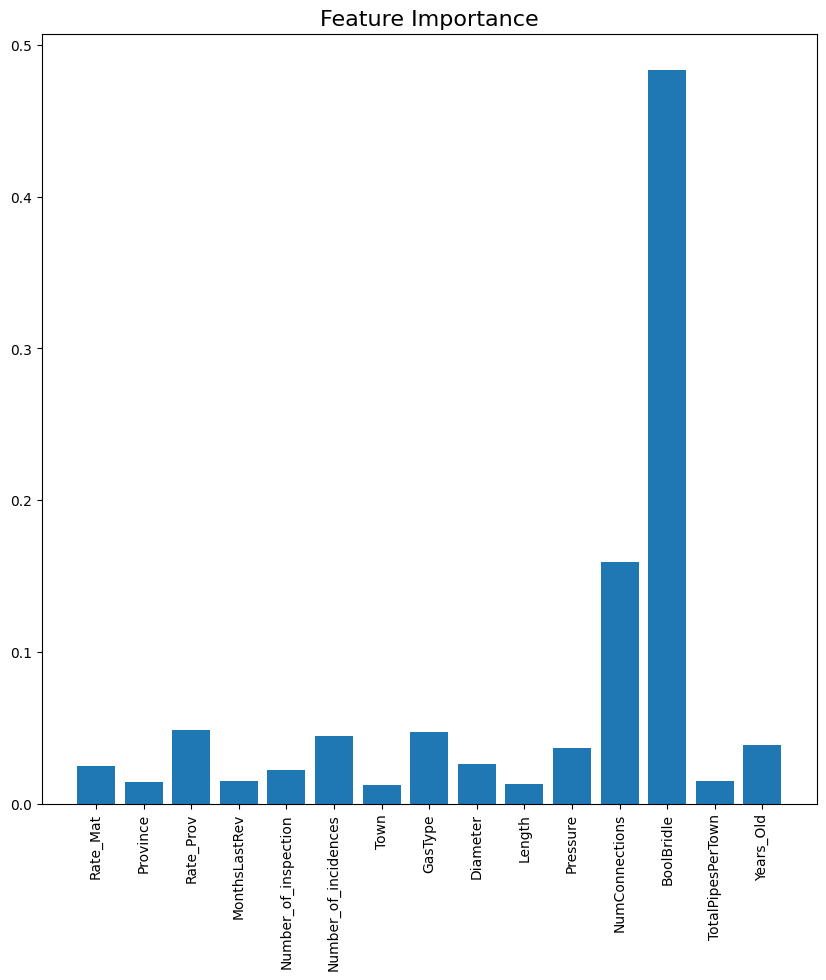

In [86]:
plt.figure(figsize=(10,10))
plt.bar(X_train.columns, clf.feature_importances_)
plt.title('Feature Importance', fontsize=16)
plt.xticks(rotation=90)
plt.show()

**Creating DataFrame with predictions for Kaggle** 

In [87]:
# calculate mean predictions
mean_predictions = predictions_df.mean(axis=1)

# create new DataFrame with PipeId_Test and mean_predictions columns
result_df = pd.DataFrame({'PipeId': PipeId_Test, 'Incidence': mean_predictions})
result_df.head()

,PipeId,Incidence
0,489780,0.076330
1,489790,0.064273
2,489792,0.122001
3,489793,0.091205
4,489981,0.055881


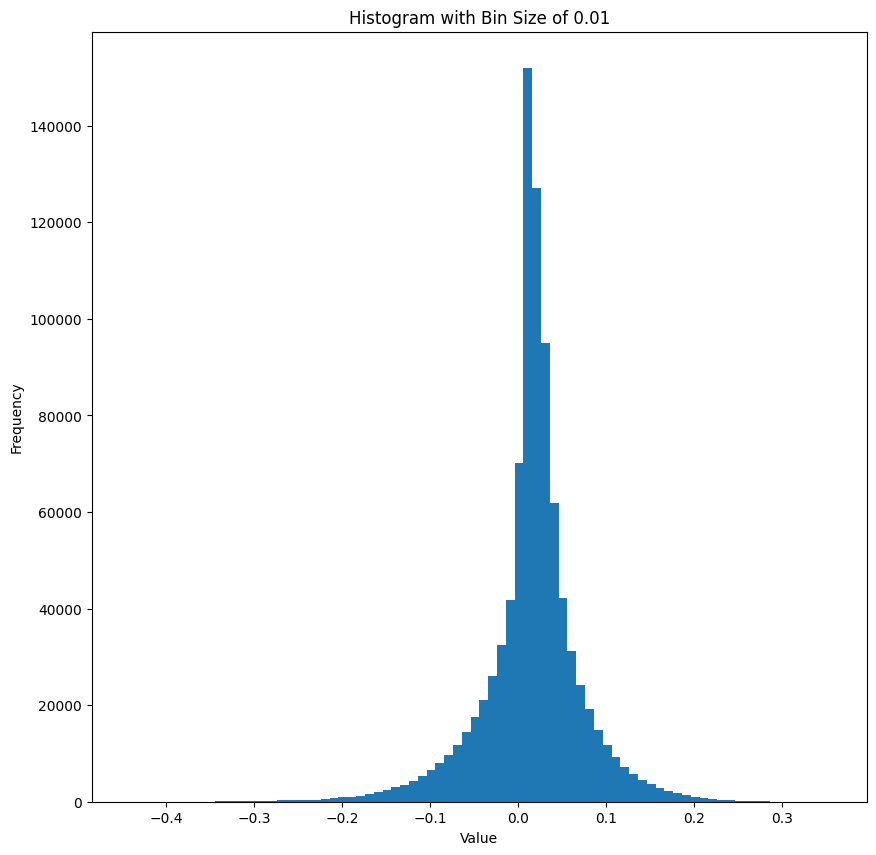

In [88]:
good_df = pd.read_csv("data/bestresult.csv")

diff = good_df.merge(result_df, on = "PipeId", how = "inner")
diff["Difference"] = diff["Incidence_x"] - diff["Incidence_y"]

# Define the bin size
bin_size = 0.01

# Calculate the number of bins
num_bins = int((diff["Difference"].max() - diff["Difference"].min()) / bin_size)

# Create the histogram
plt.figure(figsize=(10,10))
plt.hist(diff["Difference"], bins=num_bins)

# Set the x-axis label and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with Bin Size of 0.01')

# Show the plot

plt.show()

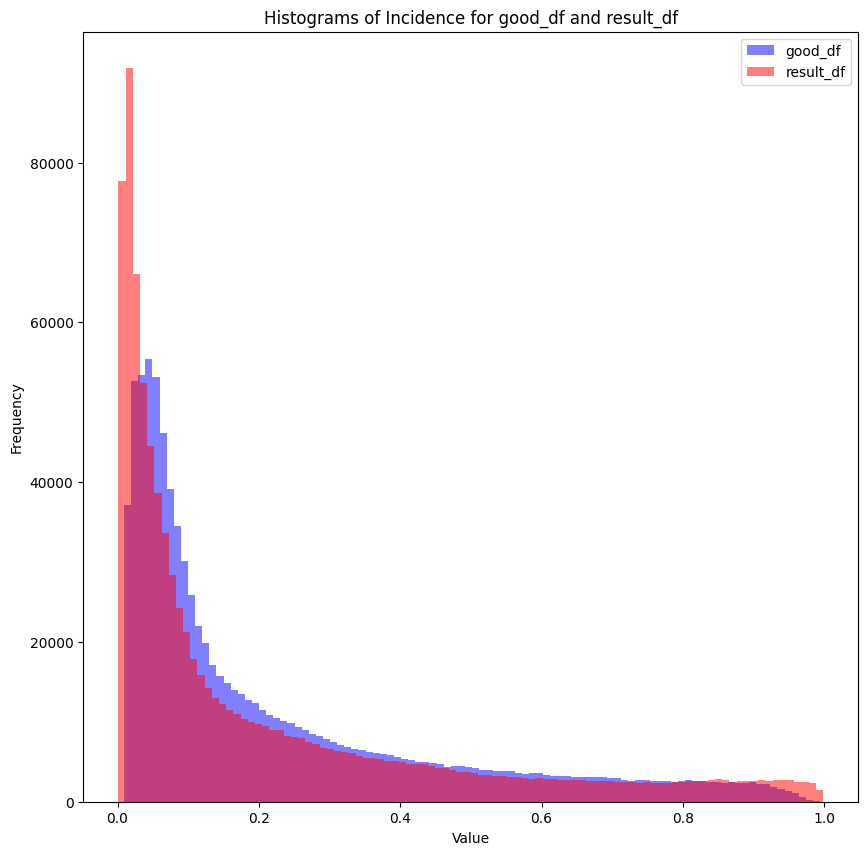

In [89]:
bin_size = 0.01

# Calculate the number of bins
num_bins = int((good_df["Incidence"].max() - good_df["Incidence"].min()) / bin_size)

# Create the histograms
plt.figure(figsize=(10,10))
plt.hist(good_df["Incidence"], bins=num_bins, color='blue', alpha=0.5, label='good_df')
plt.hist(result_df["Incidence"], bins=num_bins, color='red', alpha=0.5, label='result_df')

# Set the x-axis label and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Incidence for good_df and result_df')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

**Exporting to CSV**

In [83]:
result_df.to_csv("just1iteration_failure_or_legend.csv", index= False)